In [35]:
import imagine as im
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:

data_dir = im.config.PROCESSED_DATA_DIR
fig_dir = im.config.FIGURES_DIR/"svg"

vviq_humans = pd.read_csv(data_dir/"vviq_humans.csv")
psiq_humans = pd.read_csv(data_dir/"psiq_humans.csv")

VVIQ_LOCATIONS = ['Florida, USA', 'poland']
PSIQ_LOCATIONS = ['Florida, USA', 'United Kingdom']
vviq_items = [ 'A_1', 'A_2', 'A_3', 'A_4', 'B_1', 'B_2', 'B_3', 'B_4', 'C_1',
       'C_2', 'C_3', 'C_4', 'D_1', 'D_2', 'D_3', 'D_4', 'E_1', 'E_2', 'E_3',
       'E_4', 'F_1', 'F_2', 'F_3', 'F_4', 'G_1', 'G_2', 'G_3', 'G_4', 'H_1',
       'H_2', 'H_3', 'H_4']
psiq_items = ['App_1', 'App_2', 'App_3', 'So_1', 'So_2', 'So_3',
       'Sm_1', 'Sm_2', 'Sm_3', 'Ta_1', 'Ta_2', 'Ta_3', 'To_1', 'To_2',
       'To_3', 'Bo_1', 'Bo_2', 'Bo_3', 'Fe_1', 'Fe_2', 'Fe_3']

In [37]:
vviq_humans["score"] = vviq_humans[vviq_items].sum(axis=1)
psiq_humans["score"] = psiq_humans[psiq_items].sum(axis=1)

<Axes: xlabel='location', ylabel='score'>

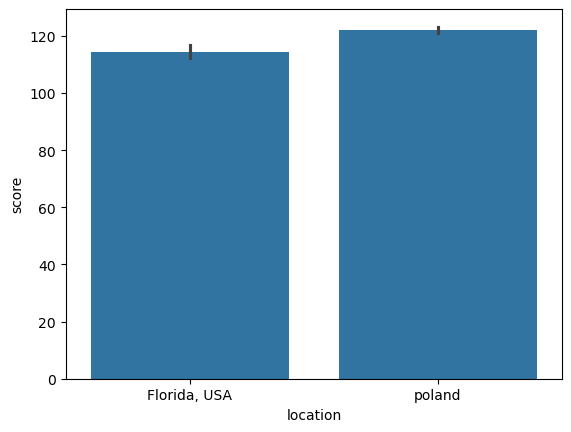

In [38]:
import seaborn as sns
sns.barplot(x="location",y="score",data=vviq_humans)

<Axes: xlabel='location', ylabel='score'>

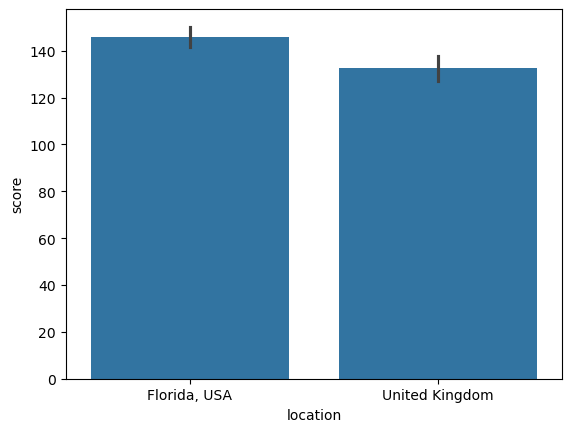

In [39]:
sns.barplot(x="location",y="score",data=psiq_humans)

<Axes: xlabel='score', ylabel='Proportion'>

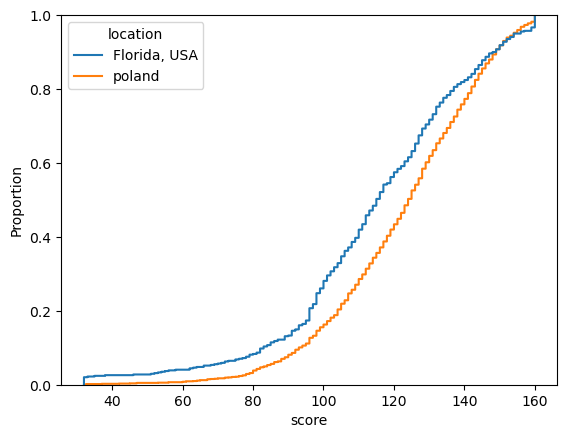

In [40]:
sns.ecdfplot(data=vviq_humans,hue="location", x="score")

<Axes: xlabel='score', ylabel='Proportion'>

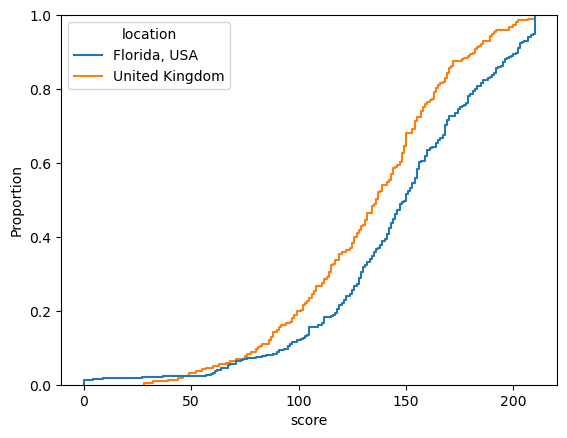

In [41]:
sns.ecdfplot(data=psiq_humans,hue="location", x="score")


In [42]:
vviq_poland = vviq_humans.loc[vviq_humans["location"]==VVIQ_LOCATIONS[-1]]
vviq_poland1 = vviq_humans.loc[vviq_humans["location"]==VVIQ_LOCATIONS[-1]].sample(n=600,random_state=100)
# Remove the sampled rows from the original DataFrame
vviq_poland_remaining = vviq_poland.drop(vviq_poland1.index)
vviq_poland2 = vviq_poland_remaining.loc[vviq_poland["location"]==VVIQ_LOCATIONS[-1]].sample(n=600,random_state=200)

In [43]:
vviq_poland["groups"]="PL"
vviq_poland1["groups"]="PL-1"
vviq_poland2["groups"]="PL-2"
vviq_florida = vviq_humans.loc[vviq_humans["location"]==VVIQ_LOCATIONS[0]]
vviq_florida["groups"]="FL"
vviq_human_groups = pd.concat([vviq_poland,vviq_poland1,vviq_poland2,vviq_florida])

/var/folders/ww/n50d9y550173l9x79nx8n45slkmm1n/T/ipykernel_23265/2803710831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vviq_poland["groups"]="PL"
/var/folders/ww/n50d9y550173l9x79nx8n45slkmm1n/T/ipykernel_23265/2803710831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vviq_florida["groups"]="FL"


In [44]:
psiq_humans

,age,sex,App_1,App_2,App_3,So_1,So_2,So_3,Sm_1,Sm_2,...,Fe_2,Fe_3,imagery metric,language,location,study,task,model,imagination_ability,score
0,22,F,4,8,7,8,5,7,8,8,...,6,8,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,143
1,20,F,10,10,10,10,10,10,10,10,...,10,10,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,210
2,19,F,7,9,4,6,8,8,6,2,...,9,3,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,132
3,19,F,10,9,7,6,7,7,7,5,...,6,7,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,154
4,18,F,9,9,8,10,10,7,10,10,...,6,9,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,36,M,7,7,8,8,8,6,6,6,...,9,8,PSIQ-21,english,United Kingdom,clma,vviq,HUMAN,HUMAN,150
547,20,F,6,8,7,8,9,9,8,8,...,8,8,PSIQ-21,english,United Kingdom,clma,vviq,HUMAN,HUMAN,161
548,34,M,6,7,5,3,8,8,7,7,...,6,6,PSIQ-21,english,United Kingdom,clma,vviq,HUMAN,HUMAN,126
549,40,F,9,9,9,10,10,10,8,8,...,8,7,PSIQ-21,english,United Kingdom,clma,vviq,HUMAN,HUMAN,166


In [45]:
psiq_humans["groups"] = psiq_humans["location"].map({'Florida, USA':"FL", 'United Kingdom':"UK"})
psiq_grp_all = psiq_humans.copy()
psiq_grp_all["groups"] = "FL+UK"

psiq_human_groups = pd.concat([psiq_humans, psiq_grp_all])
psiq_human_groups

,age,sex,App_1,App_2,App_3,So_1,So_2,So_3,Sm_1,Sm_2,...,Fe_3,imagery metric,language,location,study,task,model,imagination_ability,score,groups
0,22,F,4,8,7,8,5,7,8,8,...,8,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,143,FL
1,20,F,10,10,10,10,10,10,10,10,...,10,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,210,FL
2,19,F,7,9,4,6,8,8,6,2,...,3,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,132,FL
3,19,F,10,9,7,6,7,7,7,5,...,7,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,154,FL
4,18,F,9,9,8,10,10,7,10,10,...,9,PSIQ-21,english,"Florida, USA",sona,vviq,HUMAN,HUMAN,168,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,36,M,7,7,8,8,8,6,6,6,...,8,PSIQ-21,english,United Kingdom,clma,vviq,HUMAN,HUMAN,150,FL+UK
547,20,F,6,8,7,8,9,9,8,8,...,8,PSIQ-21,english,United Kingdom,clma,vviq,HUMAN,HUMAN,161,FL+UK
548,34,M,6,7,5,3,8,8,7,7,...,6,PSIQ-21,english,United Kingdom,clma,vviq,HUMAN,HUMAN,126,FL+UK
549,40,F,9,9,9,10,10,10,8,8,...,7,PSIQ-21,english,United Kingdom,clma,vviq,HUMAN,HUMAN,166,FL+UK


<Axes: xlabel='score', ylabel='Proportion'>

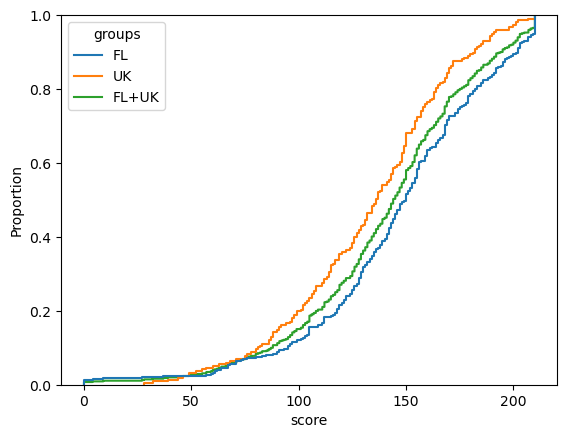

In [46]:
sns.ecdfplot(data=psiq_human_groups,hue="groups", x="score",color="black")

<Axes: xlabel='score', ylabel='Proportion'>

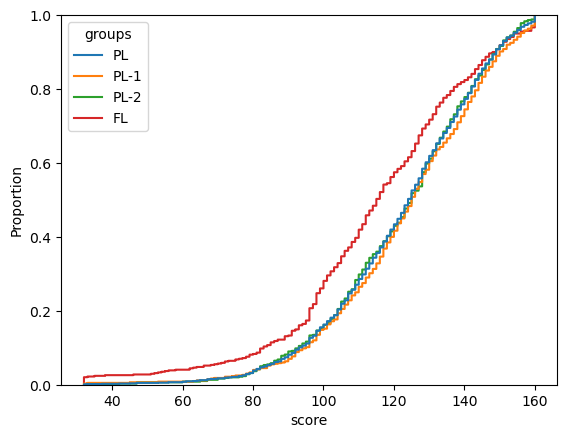

In [47]:
sns.ecdfplot(data=vviq_human_groups,hue="groups", x="score")

<Axes: xlabel='groups', ylabel='score'>

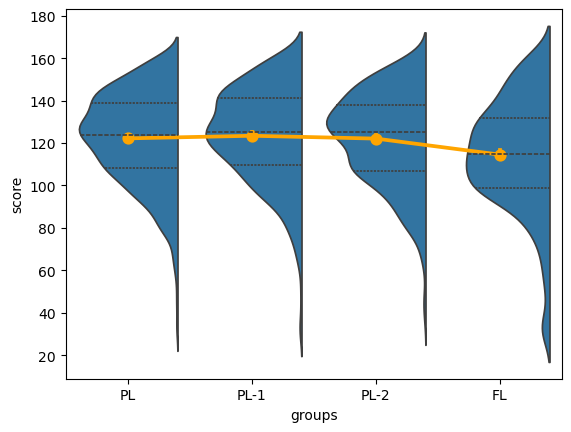

In [48]:
sns.pointplot(data=vviq_human_groups,x="groups", y="score",color="orange")
sns.violinplot(data=vviq_human_groups, x="groups", y="score", split=True, inner="quart")

<Axes: xlabel='groups', ylabel='score'>

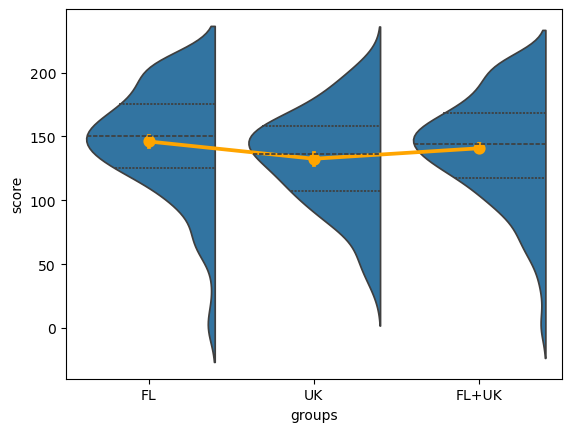

In [49]:
sns.pointplot(data=psiq_human_groups,x="groups", y="score",color="orange")
sns.violinplot(data=psiq_human_groups, x="groups", y="score", split=True, inner="quart")

# Ai data

In [50]:
vviq_ai = pd.read_csv(data_dir/"vviq_ai.csv") 
psiq_ai = pd.read_csv(data_dir/"psiq_ai.csv")

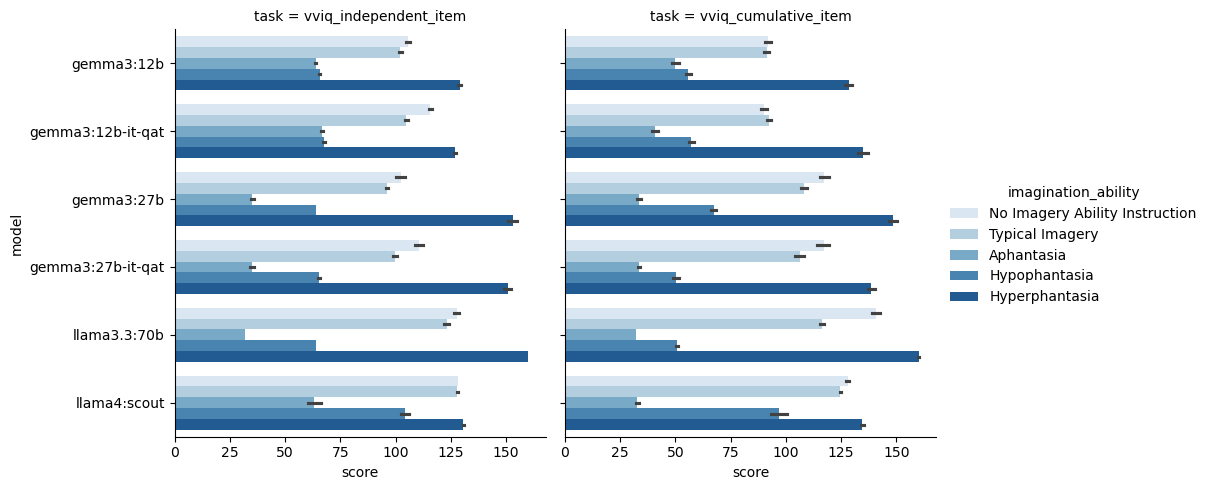

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data = vviq_ai, x = "score", y = "model", hue = "imagination_ability",kind="bar", col="task",palette="Blues")
plt.savefig(fig_dir/"vviq_imagination_ability.svg")

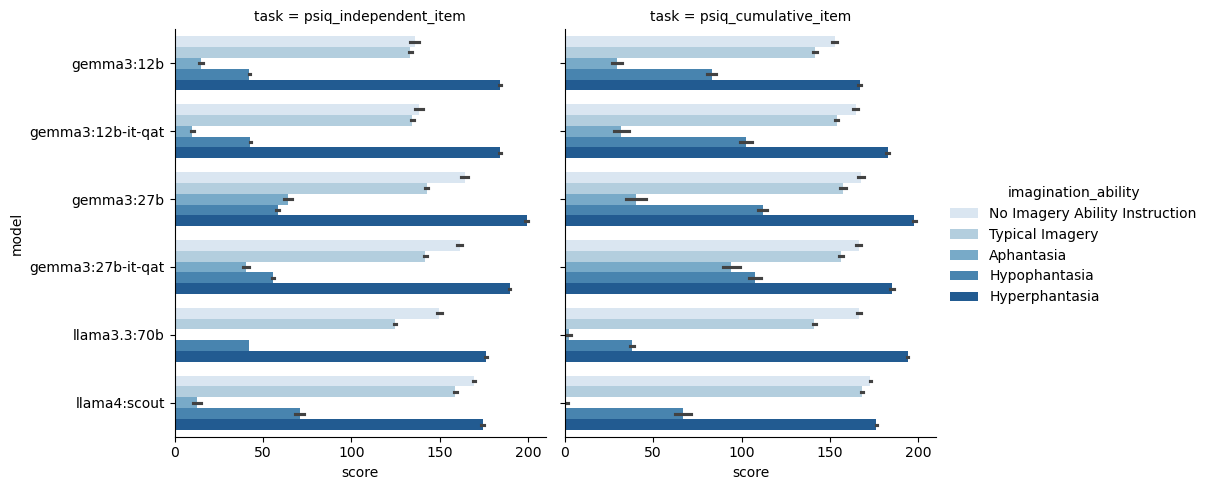

In [52]:
sns.catplot(data = psiq_ai, x = "score", y = "model", hue = "imagination_ability",kind="bar", col="task",palette="Blues")
plt.savefig(fig_dir/"psiq_imagination_ability.svg")

In [53]:
psiq_ai.columns

Index(['system_message_idx', 'task', 'model', 'imagination_ability', 'App_1',
       'App_2', 'App_3', 'Bo_1', 'Bo_2', 'Bo_3', 'Fe_1', 'Fe_2', 'Fe_3',
       'Sm_1', 'Sm_2', 'Sm_3', 'So_1', 'So_2', 'So_3', 'Ta_1', 'Ta_2', 'Ta_3',
       'To_1', 'To_2', 'To_3', 'score'],
      dtype='object')

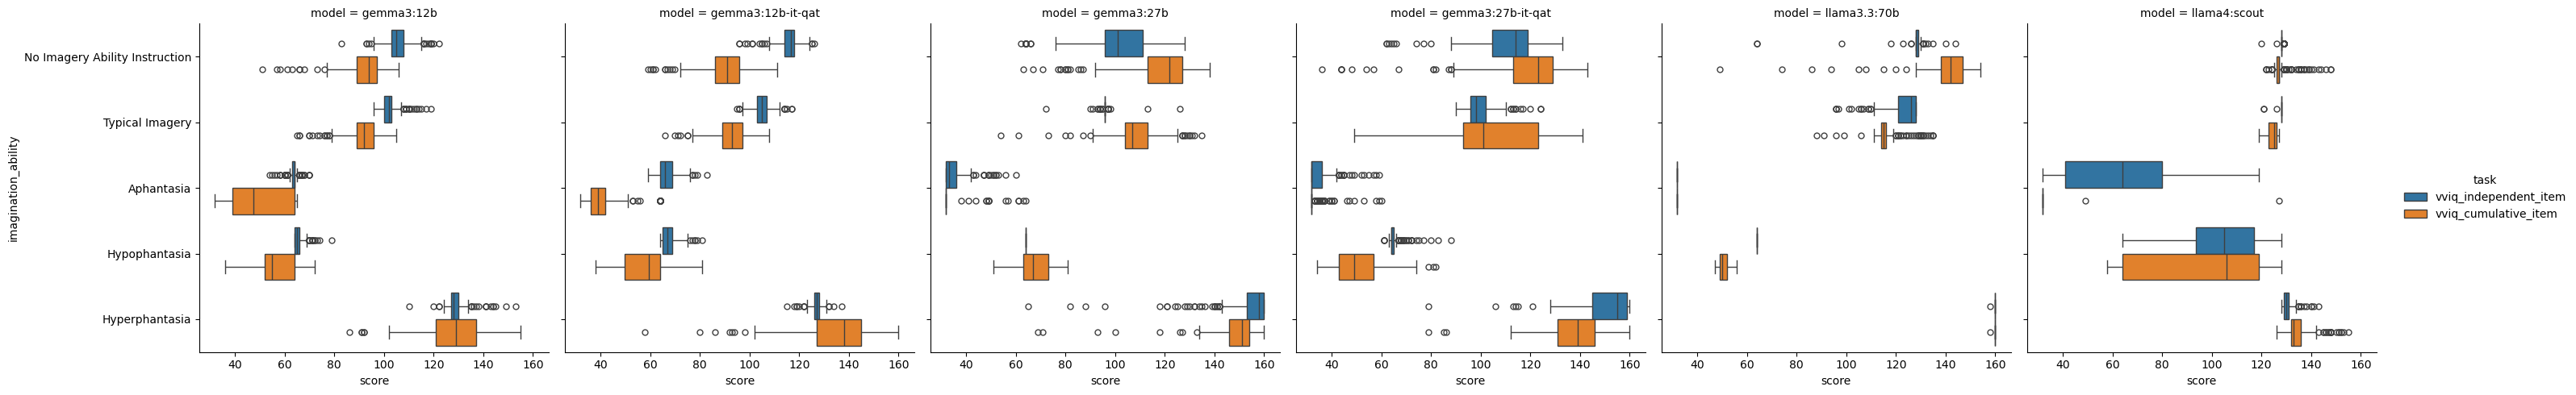

In [54]:
models = [
    "gemma3:12b",
    "gemma3:12b-it-qat",
    "gemma3:27b",
    "gemma3:27b-it-qat",
    "llama3.3:70b",
    "llama4:scout",
]
aitasks = [
    "vviq_independent_item",
    "vviq_cumulative_item",
]
# MEMORY TYPE ON VVIQ
sns.catplot(data=vviq_ai,hue="task",col="model",x="score",y="imagination_ability",kind="box")

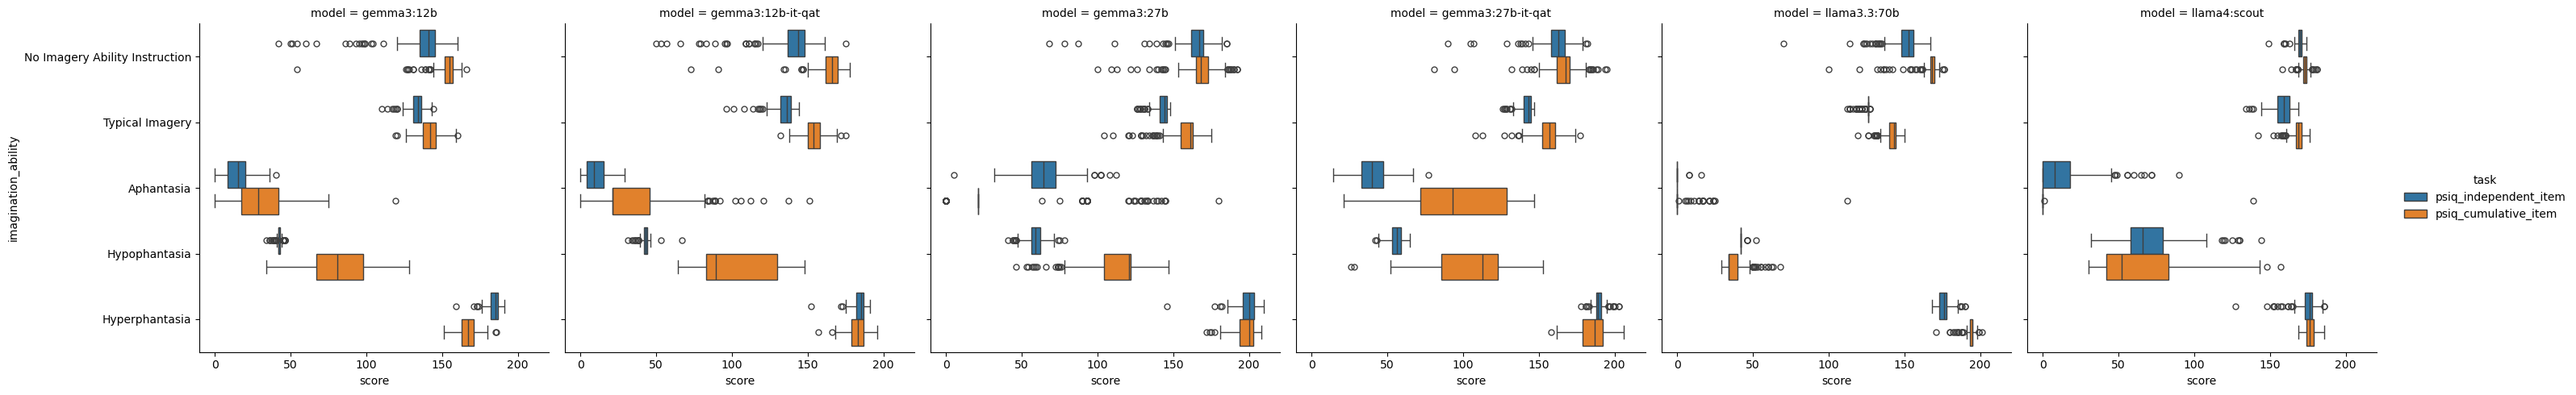

In [55]:
sns.catplot(data=psiq_ai,hue="task",col="model",x="score",y="imagination_ability",kind="box")

# POPULATION DIVERSITY SAMPLING

In [56]:
vviq_quantiles = vviq_humans["score"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
psiq_quantiles = psiq_humans["score"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
vviq_quantiles = list(vviq_quantiles)
psiq_quantiles = list(psiq_quantiles)
list(vviq_quantiles),len(vviq_quantiles), list(psiq_quantiles),len(psiq_quantiles)

([32.0, 91.0, 101.0, 109.0, 116.0, 123.0, 128.0, 134.0, 142.0, 149.0, 160.0],
 11,
 [0.0, 88.0, 109.0, 125.0, 134.0, 144.0, 153.0, 163.0, 175.0, 194.0, 210.0],
 11)

In [57]:
pds_vviq_ai = im.sim_data.sample_from_quantiles(vviq_ai,vviq_quantiles,N=60)

vviq_independent_item gemma3:12b (600, 37)
vviq_independent_item gemma3:12b-it-qat (600, 37)
vviq_independent_item gemma3:27b (600, 37)
vviq_independent_item gemma3:27b-it-qat (600, 37)
vviq_independent_item llama3.3:70b (600, 37)
vviq_independent_item llama4:scout (600, 37)
vviq_cumulative_item gemma3:12b (600, 37)
vviq_cumulative_item gemma3:12b-it-qat (600, 37)
vviq_cumulative_item gemma3:27b (600, 37)
vviq_cumulative_item gemma3:27b-it-qat (600, 37)
vviq_cumulative_item llama3.3:70b (600, 37)
vviq_cumulative_item llama4:scout (600, 37)


In [58]:
pds_psiq_ai = im.sim_data.sample_from_quantiles(psiq_ai,psiq_quantiles,N=60)


psiq_independent_item gemma3:12b (600, 26)
psiq_independent_item gemma3:12b-it-qat (600, 26)
psiq_independent_item gemma3:27b (600, 26)
psiq_independent_item gemma3:27b-it-qat (600, 26)
psiq_independent_item llama3.3:70b (600, 26)
psiq_independent_item llama4:scout (600, 26)
psiq_cumulative_item gemma3:12b (600, 26)
psiq_cumulative_item gemma3:12b-it-qat (600, 26)
psiq_cumulative_item gemma3:27b (600, 26)
psiq_cumulative_item gemma3:27b-it-qat (600, 26)
psiq_cumulative_item llama3.3:70b (600, 26)
psiq_cumulative_item llama4:scout (600, 26)


In [59]:
pds_vviq_ai_df = pd.concat(pds_vviq_ai.values())
pds_psiq_ai_df = pd.concat(pds_psiq_ai.values())

In [60]:
pds_vviq_ai_df.task = pds_vviq_ai_df.task.map({"vviq_independent_item":"independent","vviq_cumulative_item":"cumulative"})
pds_vviq_ai_df["groups"] = pds_vviq_ai_df["model"]+"_"+ pds_vviq_ai_df["task"]


pds_psiq_ai_df.task = pds_psiq_ai_df.task.map({"psiq_independent_item":"independent","psiq_cumulative_item":"cumulative"})
pds_psiq_ai_df["groups"] = pds_psiq_ai_df["model"]+"_"+ pds_psiq_ai_df["task"]


In [61]:
vviq_all_data = pd.concat([vviq_human_groups,pds_vviq_ai_df])
psiq_all_data = pd.concat([psiq_human_groups,pds_psiq_ai_df])

# PLOT DATA

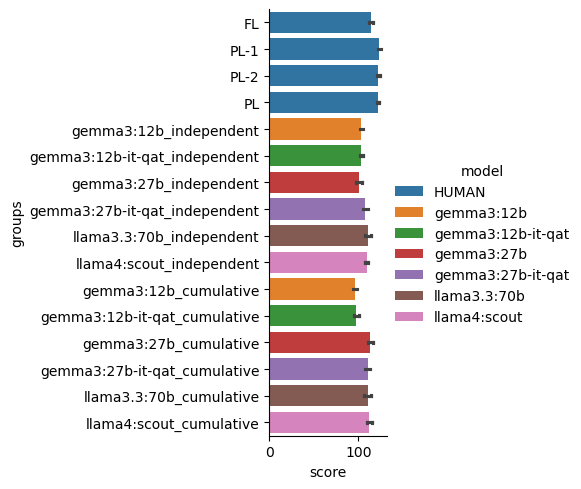

In [62]:
vviq_order_grp = ['FL', 'PL-1', 'PL-2','PL' , 'gemma3:12b_independent',
       'gemma3:12b-it-qat_independent', 'gemma3:27b_independent',
       'gemma3:27b-it-qat_independent', 'llama3.3:70b_independent',
       'llama4:scout_independent','gemma3:12b_cumulative',
       'gemma3:12b-it-qat_cumulative', 'gemma3:27b_cumulative',
       'gemma3:27b-it-qat_cumulative', 'llama3.3:70b_cumulative',
       'llama4:scout_cumulative']
sns.catplot(data=vviq_all_data,hue="model",y="groups", x="score",kind="bar",order = vviq_order_grp,capsize=0.02)
plt.savefig(fig_dir/"mean_vviq_score_means.svg")

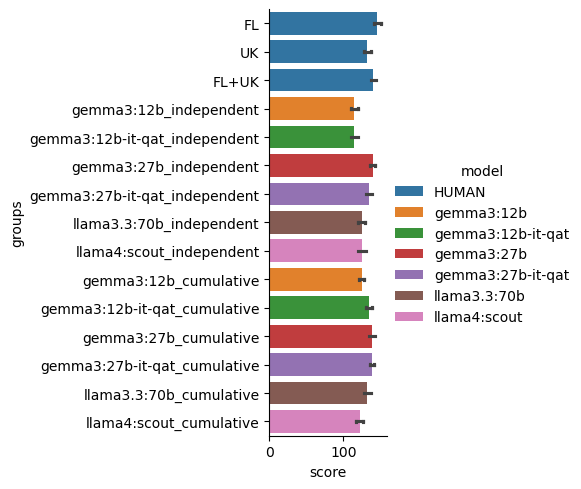

In [63]:
psiq_order_grp = ['FL', 'UK', 'FL+UK' , 'gemma3:12b_independent',
       'gemma3:12b-it-qat_independent', 'gemma3:27b_independent',
       'gemma3:27b-it-qat_independent', 'llama3.3:70b_independent',
       'llama4:scout_independent','gemma3:12b_cumulative',
       'gemma3:12b-it-qat_cumulative', 'gemma3:27b_cumulative',
       'gemma3:27b-it-qat_cumulative', 'llama3.3:70b_cumulative',
       'llama4:scout_cumulative']
sns.catplot(data=psiq_all_data,hue="model",y="groups", x="score",kind="bar",order = psiq_order_grp,capsize=0.02)
plt.savefig(fig_dir/"mean_psiq_score_means.svg")

In [64]:
vviq_all_data["groups"] = pd.Categorical(vviq_all_data["groups"],categories = vviq_order_grp)
psiq_all_data["groups"] = pd.Categorical(psiq_all_data["groups"],categories = psiq_order_grp)

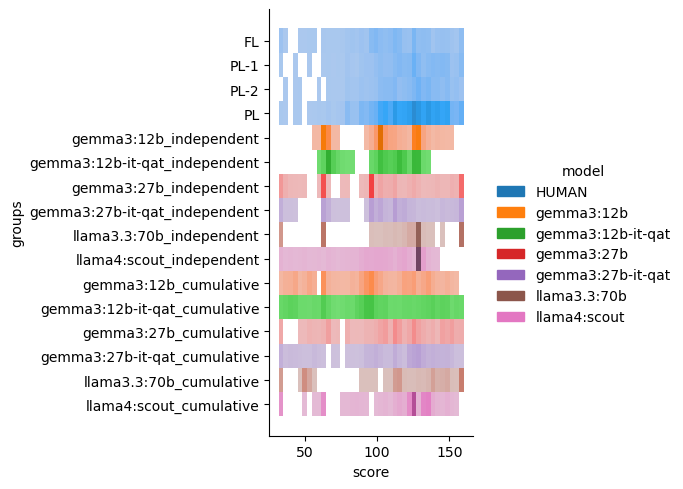

In [65]:
sns.displot(data=vviq_all_data,hue="model",y="groups", x="score")
plt.savefig(fig_dir/"vviq_score_distribution.svg")

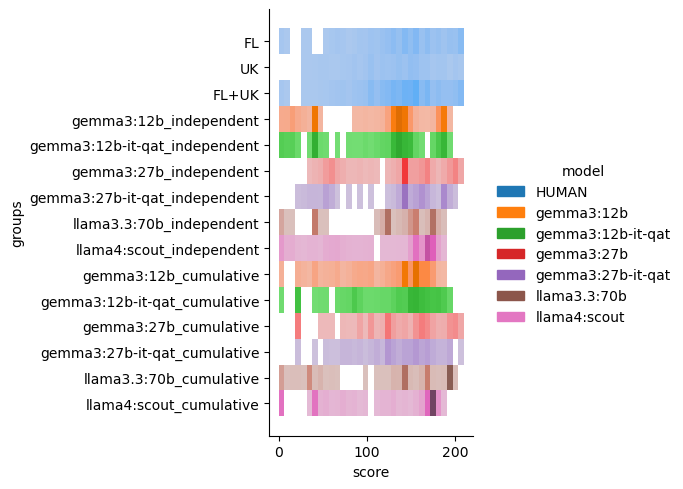

In [66]:
sns.displot(data=psiq_all_data,hue="model",y="groups", x="score")
plt.savefig(fig_dir/"psiq_score_distribution.svg")

# original AI data Score Distribution in different imagination ability

/Users/saurabh.ranjan/anaconda3/envs/imaginenet/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


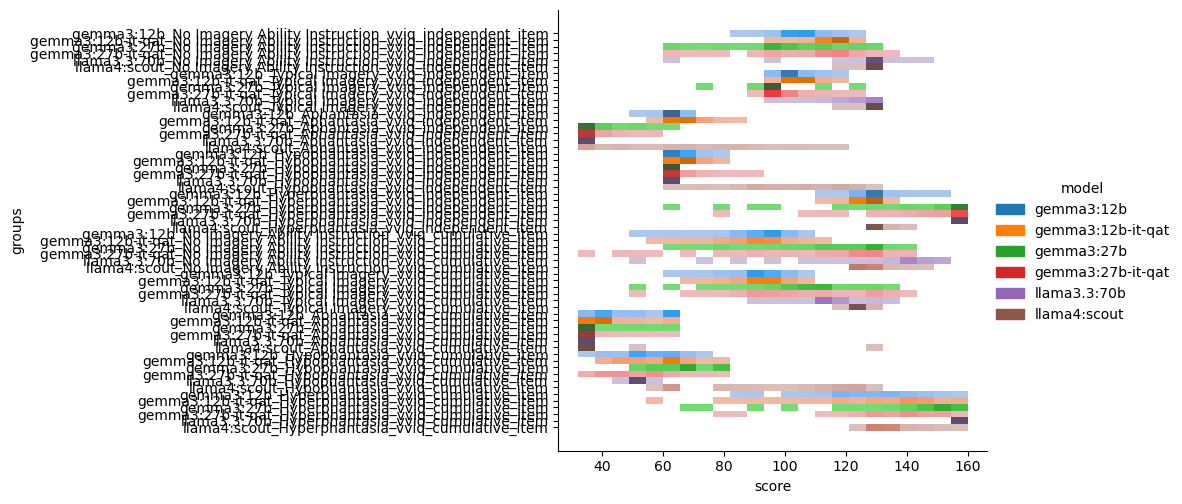

In [67]:
vviq_ai["groups"] = vviq_ai["model"]+"_"+vviq_ai["imagination_ability"]+"_"+vviq_ai["task"]
sns.displot(data=vviq_ai,hue="model",y="groups", x="score")

/Users/saurabh.ranjan/anaconda3/envs/imaginenet/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


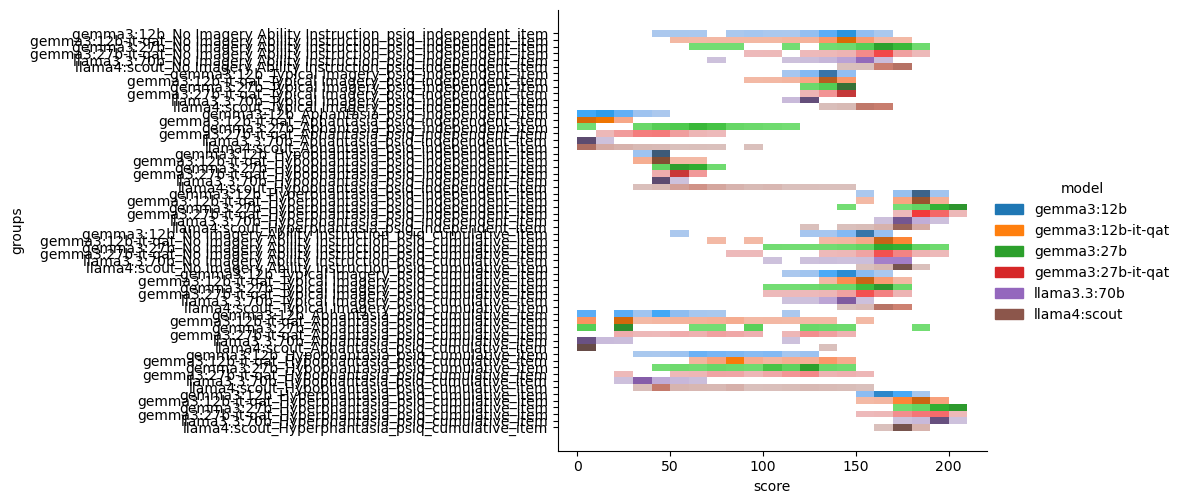

In [68]:
psiq_ai["groups"] = psiq_ai["model"]+"_"+psiq_ai["imagination_ability"]+"_"+psiq_ai["task"]
sns.displot(data=psiq_ai,hue="model",y="groups", x="score")


# save data

In [69]:
vviq_all_data.to_csv(data_dir/"all_vviq_groups.csv")
psiq_all_data.to_csv(data_dir/"all_psiq_groups.csv")